### Apartat B

In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model, svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
np.random.seed(1)

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

classifiers = [
    LogisticRegression(max_iter=10000),
    svm.SVC(kernel='linear', C=1.0),
    svm.LinearSVC(C=1.0, max_iter=1000000),
    svm.SVC(kernel='rbf', gamma=0.7, C=1.0),
    svm.SVC(kernel='poly', degree=3, gamma='auto', C=1.0),
    linear_model.SGDClassifier(loss="modified_huber", alpha=0.1),
    neighbors.KNeighborsClassifier(n_neighbors=15),
    tree.DecisionTreeClassifier(),
    naive_bayes.GaussianNB()
]

scores = {}

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    score = classifier.score(X_test, y_test)
    print(f'{classifier.__class__.__name__}: {score}')
    scores[classifier.__class__.__name__] = score

# scores

# plt.figure(figsize=(14, 3))
# plt.bar(scores.keys(), scores.values())

LogisticRegression: 0.9736842105263158
SVC: 1.0
LinearSVC: 0.8947368421052632
SVC: 0.9736842105263158
SVC: 1.0
SGDClassifier: 0.9736842105263158
KNeighborsClassifier: 0.9736842105263158
DecisionTreeClassifier: 0.9736842105263158
GaussianNB: 0.9736842105263158


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

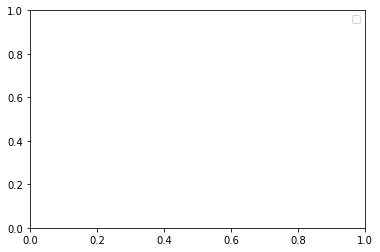

In [3]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

n_classes = 0

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()